# Background
The nonprofit foundation Alphabet Soup wants a tool that can help it select the applicants for funding with the best chance of success in their ventures. With your knowledge of machine learning and neural networks, you’ll use the features in the provided dataset to create a binary classifier that can predict whether applicants will be successful if funded by Alphabet Soup.

# Data
From Alphabet Soup’s business team, you have received a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. Within this dataset are a number of columns that capture metadata about each organization, such as:  

   
   <span style='color:red'>EIN and NAME—Identification columns  
    APPLICATION_TYPE—Alphabet Soup application type  
    AFFILIATION—Affiliated sector of industry  
    CLASSIFICATION—Government organization classification  
    USE_CASE—Use case for funding  
    ORGANIZATION—Organization type  
    STATUS—Active status  
    INCOME_AMT—Income classification  
    SPECIAL_CONSIDERATIONS—Special consideration for application  
    ASK_AMT—Funding amount requested  
    IS_SUCCESSFUL—Was the money used effectively
</span>

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt


#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head(1)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = application_df.drop(['EIN', 'NAME'], axis=1)
df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

### Binning 

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type = df['APPLICATION_TYPE'].value_counts()
print(app_type)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type[app_type<500].index)
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [6]:
# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
countsbinning = df['CLASSIFICATION'].value_counts()
countsbinning

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
countsclassification = countsbinning[countsbinning>1]
countsclassification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(countsbinning[countsbinning<100].index)
print(len(classifications_to_replace))

60


In [10]:
# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
df = pd.get_dummies(df,dtype=float)
df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Split our preprocessed data into our features and target arrays
# Target
y = df['IS_SUCCESSFUL'].values
# Features
X = df.drop('IS_SUCCESSFUL', axis=1).values

In [13]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [15]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=50,
        step=2), activation=activation, input_dim=len(X_train_scaled[0])))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=14,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [16]:
# Import the kerastuner library
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    project_name="keras_tuner",
    overwrite=True,
    max_epochs=50,
    hyperband_iterations=2)

In [17]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled, y_train, epochs = 100, validation_data=(X_test_scaled,y_test))

Trial 180 Complete [00h 01m 23s]
val_accuracy: 0.7332944869995117

Best val_accuracy So Far: 0.73399418592453
Total elapsed time: 00h 47m 57s
INFO:tensorflow:Oracle triggered exit


In [18]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'sigmoid',
 'first_units': 37,
 'num_layers': 3,
 'units_0': 7,
 'units_1': 11,
 'units_2': 7,
 'units_3': 7,
 'units_4': 7,
 'units_5': 1,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 17,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0074'}

In [19]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5716 - accuracy: 0.7340 - 419ms/epoch - 2ms/step
Loss: 0.57158362865448, Accuracy: 0.73399418592453


In [20]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 37)                1850      
                                                                 
 dense_1 (Dense)             (None, 7)                 266       
                                                                 
 dense_2 (Dense)             (None, 11)                88        
                                                                 
 dense_3 (Dense)             (None, 7)                 84        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 2,296
Trainable params: 2,296
Non-trainable params: 0
_________________________________________________________________


In [21]:
# This cell and the folllowing 4 cells are only neccesary to record the checkpoints for our final model 
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1=3
hidden_nodes_layer2=9
hidden_nodes_layer3=3
activation='relu'

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=activation))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=activation))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=activation))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3)                 150       
                                                                 
 dense_6 (Dense)             (None, 9)                 36        
                                                                 
 dense_7 (Dense)             (None, 3)                 30        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [23]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

In [24]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [25]:
# Train the model with checkpoint saves
fit_model = nn.fit(X_train_scaled,y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.6368 - accuracy: 0.6561
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5810 - accuracy: 0.7197
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5732 - accuracy: 0.7215
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5691 - accuracy: 0.7232
Epoch 5/100
769/804 [===========================>..] - ETA: 0s - loss: 0.5634 - accuracy: 0.7244
Epoch 5: saving model to checkpoints\weights.05hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5634 - accuracy: 0.7241
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5600 - accuracy: 0.7249
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5578 - accuracy: 0.7277
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5565 - accuracy: 0.7275
Epoch 9/100
804/804 [==============================] - 

776/804 [===========================>..] - ETA: 0s - loss: 0.5502 - accuracy: 0.7284
Epoch 65: saving model to checkpoints\weights.65hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5502 - accuracy: 0.7284
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5502 - accuracy: 0.7283
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5504 - accuracy: 0.7284
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5502 - accuracy: 0.7290
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5506 - accuracy: 0.7283
Epoch 70/100
791/804 [============================>.] - ETA: 0s - loss: 0.5503 - accuracy: 0.7287
Epoch 70: saving model to checkpoints\weights.70hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5501 - accuracy: 0.7291
Epoch 71/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5501 - accuracy: 0.7289
Epoch 72/100
804/804 [=

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5716 - accuracy: 0.7340 - 253ms/epoch - 944us/step
Loss: 0.57158362865448, Accuracy: 0.73399418592453


<AxesSubplot:>

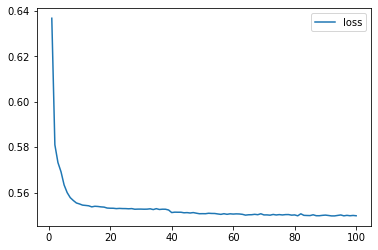

In [27]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

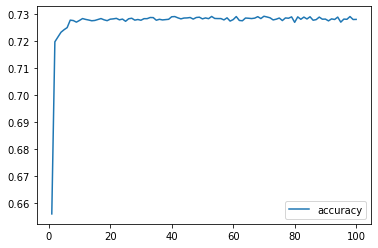

In [28]:
# Plot the accuracy
history_df.plot(y="accuracy")

### Optimizing

#### Parameters Test 1
<span style='color:blue'>Layer 1 = units: 7 activation='relu'  
    Layer 2 = units: 7 activation='relu'  
    Layer 3 = units: 7 activation='relu'  
    Epochs:150  
    Optimizer: Nadam
</span>
#### Results 
<span style='color:red'>268/268 - 0s - loss: 0.5557 - accuracy: 0.7258 - 205ms/epoch - 764us/step
Loss: 0.5556878447532654, Accuracy: 0.7258309125900269</span>

#### Parameters Test 2
<span style='color:blue'>Layer 1 = units: 7 activation='relu'  
    Layer 2 = units: 14 activation='relu'  
    Layer 3 = units: 14 activation='relu'  
    Epochs:150  
    Optimizer: Nadam
</span>
#### Results 
<span style='color:red'>268/268 - 0s - loss: 0.5554 - accuracy: 0.7291 - 192ms/epoch - 718us/step
Loss: 0.5553504228591919, Accuracy: 0.7290962338447571</span>

#### Parameters Test 3
<span style='color:blue'>Layer 1 = units: 14 activation='relu'  
    Layer 2 = units: 14 activation='relu'  
    Layer 3 = units: 14 activation='relu'  
    Epochs:150  
    Optimizer: Nadam
</span>
#### Results 
<span style='color:red'>268/268 - 0s - loss: 0.5500 - accuracy: 0.7289 - 210ms/epoch - 782us/step
Loss: 0.5500489473342896, Accuracy: 0.728863000869751</span>

#### Parameters Test 4
<span style='color:blue'>Layer 1 = units: 7 activation='relu'  
    Layer 2 = units: 14 activation='relu'  
    Epochs:50  
    Optimizer: adam
</span>
#### Results 
<span style='color:red'>268/268 - 0s - loss: 0.5493 - accuracy: 0.7333 - 272ms/epoch - 1ms/step
Loss: 0.5492851734161377, Accuracy: 0.7332944869995117</span>

#### Parameters Test 5
<span style='color:blue'>Layer 1 = units: 14 activation='relu'  
    Layer 2 = units: 14 activation='relu'  
    Epochs:50  
    Optimizer: adam
</span>
#### Results 
<span style='color:red'>268/268 - 0s - loss: 0.5518 - accuracy: 0.7292 - 274ms/epoch - 1ms/step
Loss: 0.551796555519104, Accuracy: 0.7292128205299377</span>

#### Parameters Test 6
<span style='color:blue'>Layer 1 = units: 6 activation='relu'  
    Layer 2 = units: 6 activation='relu'  
    Epochs:50  
    Optimizer: adam
</span>
#### Results 
<span style='color:red'>268/268 - 0s - loss: 0.5544 - accuracy: 0.7262 - 280ms/epoch - 1ms/step
Loss: 0.5544414520263672, Accuracy: 0.7261807322502136</span>

#### Parameters Test 7
<span style='color:blue'>Layer 1 = units: 6 activation='relu'  
    Layer 2 = units: 6 activation='relu'  
    Layer 3 = units: 6 activation='relu'  
    Epochs:50  
    Optimizer: adam
</span>
#### Results 
<span style='color:red'>
268/268 - 0s - loss: 0.5514 - accuracy: 0.7270 - 277ms/epoch - 1ms/step
Loss: 0.5514025688171387, Accuracy: 0.7269970774650574</span>

#### Parameters Test 8
<span style='color:blue'>Layer 1 = units: 6 activation='relu'  
    Layer 2 = units: 6 activation='relu'  
    Layer 3 = units: 6 activation='relu'  
    Layer 4 = units: 6 activation='relu'  
    Epochs:50  
    Optimizer: adam
</span>
#### Results 
<span style='color:red'>
268/268 - 0s - loss: 0.5537 - accuracy: 0.7273 - 291ms/epoch - 1ms/step
Loss: 0.5536748766899109, Accuracy: 0.7273469567298889</span>

#### Parameters Test 9
<span style='color:blue'>Layer 1 = units: 16 activation='relu'  
    Layer 2 = units: 16 activation='relu'    
    Epochs:50  
    Optimizer: adam
</span>
#### Results 
<span style='color:red'>
268/268 - 0s - loss: 0.5539 - accuracy: 0.7277 - 282ms/epoch - 1ms/step
Loss: 0.5538676977157593, Accuracy: 0.7276967763900757</span>

#### Parameters Test 10
<span style='color:blue'>Layer 1 = units: 16 activation='tanh'  
    Layer 2 = units: 16 activation='tanh'  
    Epochs:50  
    Optimizer: adam
</span>
#### Results 
<span style='color:red'>
268/268 - 0s - loss: 0.5512 - accuracy: 0.7278 - 373ms/epoch - 1ms/step
Loss: 0.5512418746948242, Accuracy: 0.7278134226799011</span>

#### Parameters Test 11
<span style='color:blue'>Layer 1 = units: 16 activation='tanh'  
    Layer 2 = units: 16 activation='tanh'  
    Epochs:50  
    Optimizer: Nadam
</span>
#### Results 
<span style='color:red'>
268/268 - 0s - loss: 0.5498 - accuracy: 0.7317 - 263ms/epoch - 982us/step
Loss: 0.5497620701789856, Accuracy: 0.7316617965698242</span>

#### Parameters Test 12
<span style='color:blue'>Layer 1 = units: 16 activation='tanh'  
    Layer 2 = units: 16 activation='tanh'  
    Epochs:150  
    Optimizer: Nadam
</span>
#### Results 
<span style='color:red'>
268/268 - 0s - loss: 0.5541 - accuracy: 0.7294 - 206ms/epoch - 769us/step
Loss: 0.5540807247161865, Accuracy: 0.7294460535049438</span>

#### Parameters Test 13
<span style='color:blue'>Layer 1 = units: 8 activation='tanh'  
    Layer 2 = units: 16 activation='tanh'  
    Epochs:150   
    Optimizer: Nadam
</span>
#### Results 
<span style='color:red'>
268/268 - 0s - loss: 0.5546 - accuracy: 0.7247 - 297ms/epoch - 1ms/step
Loss: 0.5546478629112244, Accuracy: 0.7246647477149963</span>

#### Parameters Test 14
<span style='color:blue'>Layer 1 = units: 7 activation='relu'  
    Layer 2 = units: 14 activation='relu'  
    Epochs:100 
    Optimizer: adam
</span>
#### Results 
<span style='color:green'>268/268 - 0s - loss: 0.5508 - accuracy: 0.7336 - 193ms/epoch - 721us/step
Loss: 0.5507572889328003, Accuracy: 0.7336443066596985</span>

In [29]:
# Export our model to HDF5 file
nn.save('/content/AlphabetSoupCharity.h5')